# <center>Introduction on Using the language R to access Event Data

In this tutorial we find all the seismic events that happend in set time. By the end of this notebook you should be able to make a event map like the one below.<img src="event.png" height="500" width="500"> 

## &nbsp; Table of contents

### 1. Introduction
### 2. Set Up
### 3. Get Event Data
### 4. Visualising Event Data

## &nbsp; 1. Introduction

In this tutorial we will be learning how to use the language R to be able to access event data for a set time period 

R is a language made for statisticians by statisticians. It is an open source language which anyone can make a package for. This means that R has a lot of useful functions for all kinds of research.

This tutorial assumes that you have basic knowledge of the language R, but basic knowledge of any programming language should be sufficient to follow this tutorial.
We will be using the packages IRISSeismic (https://CRAN.R-project.org/package=IRISSeismic) and maps (https://CRAN.R-project.org/package=maps ).<br>

This tutorial will be using GeoNet's FDSN webservices. FDSN stands for Federation of Digital Seismograph Networks. Their specifications make sure there is a consistent way for people to access seismic data. 
IRIS(Incorporated Research Institutions for Seismology) also have a FDSN webservice which IRISSeismic was written for. As such some of the functions in IRISSeismic may not work on GeoNet's data.

All data will be save into R as a data frame which is much like, what would be called, a dictionary in other languages, but with a few more restrictions to the data structure. To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame

## &nbsp; 2. Set Up

###### Install the IRISSeismic and maps packages

In [ ]:
install.packages("IRISSeismic")
install.packages("maps")
install.packages("mapdata")

In [3]:
#library(help = "IRISSeismic")

Note this code might take some time to run but you only need to run this ONCE. 
IRISSemismic has many functions that may be useful. To see a list of them all with description run `library(help = "IRISSeismic")`

###### Import the library and set your URLs to the same as below

In [17]:
library(IRISSeismic)
library(maps)
library(mapdata)
acr <- new('IrisClient', site = 'https://service.geonet.org.nz')

GeoNet has two FDSN services <br>
For waveform data
an archive service holds verified data starting 7 days after collection, 
and a near real-time service holds data that could be incomplete from the last 8 days<br>
For the event and station data there is no distinction between these services 

###### Set the start and end time of the data you want to select

In [19]:
starttime <- as.POSIXct("2016-11-13",tz="UTC")
endtime <-  as.POSIXct("2016-11-14", tz="UTC")

Note that time must be in UTC (Universal Time Coordinated) which is 13 or 12 hours behind nzt (New Zealand Time) (depending on daylight savings time).
Also Note that GMT or Greenwich mean time is the same time as UTC.
    In this case we are looking at the 2016 Kaikoura earthquake which happened just after midnight on 14th of November. So just after 11am on the 13th of November in UTC.
    There are online converters if needed.
    You can add to the time in number of seconds eg. `stattime + 60` would be the time 2016-11-13 00:01:00.000<br>

## &nbsp; 3. Get Event Data

Event data is a catalogue of all the events such as earthquakes that the New Zealand network of seismometers have detected.
The `getEvent` function with return a R `data.frame` with column that has `eventId` `time`  `latitude` `longitude` `depth` `author` `cCatalog` `contributor` `contributorId` `magType` `magnitude` `magAuthor` and `eventLocationName.` 
Each row is a different event<br>

###### Get event data

In [20]:
events <- getEvent(acr, starttime, endtime, minmag=6)

The parameters needed are service, starttime and endtime.
    You can also look by magnitude with `minmag=` and `maxmag=`.
    You can look by depth with `mindepth=` and `maxdepth=`.
    Another parameter you can look by is magnitude type with `magtype= `.

###### See the number of events

In [21]:
nrow(events)
"earthquakes found with magnitude > 6"

[1] 5

[1] "earthquakes found with magnitude > 6"

## &nbsp; 4. Visualise event data

###### Plot the map

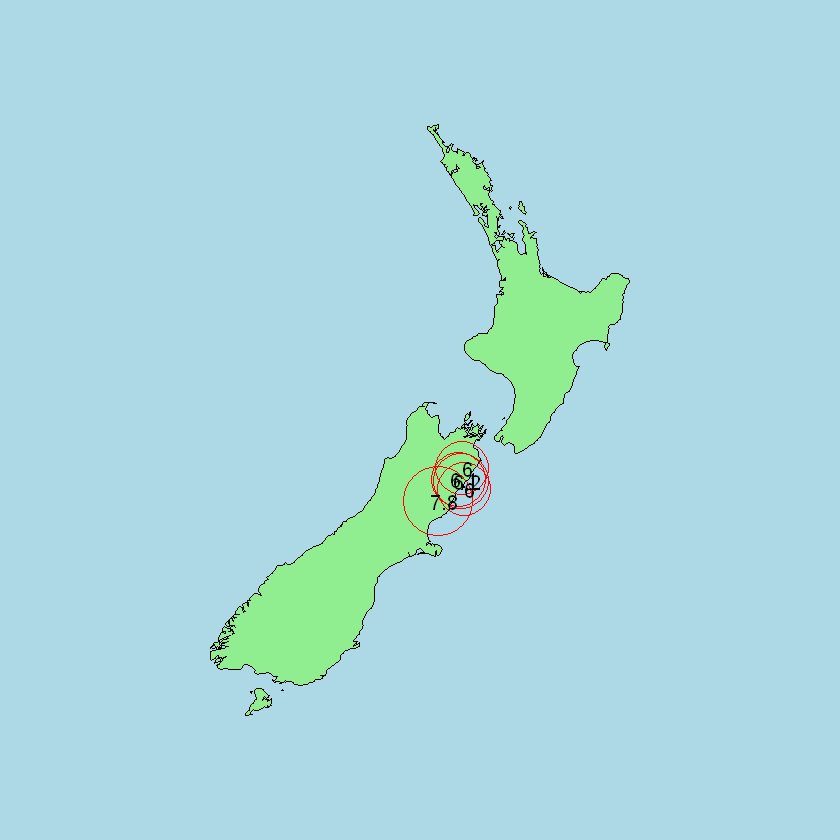

In [28]:
map("nz", fill=TRUE, col="lightgreen", bg= "light blue")
points(events$longitude, events$latitude, pch=1, cex=events$magnitude, col='red')
labels <- paste(" ", as.character(round(events$magnitude,1)))
text(events$longitude, events$latitude, labels=labels, cex=1)

The function `map` makes the base map. The function `points` makes a point for each event.
    The point is given an x,y coordinate of its longitude and latitude.
    The function`pch` say what shape will be plotted `pch=1` say the shape will be circle with its centre on the point.
    The function `cex` say the size of the shape will be. In the code above this is set to the magnitude of the event.
If you right click on this plot in the notebook you can save it

This map shows all of nz but the events are all in one place so I want to "zoom in"

###### Set parameters for map

In [23]:
xhigh <- max(events$longitude)+ .5
xlow <- min(events$longitude)- .5
yhigh <- max(events$latitude)+ .5
ylow <- min(events$latitude)- .5

We can take the maximum longitude shown on the map to the maximum longitude of all the events and the same for minimum and latitude. 
So that the data is not on the edge of the map we can make sure all points are at least 0.5 from the edge of the map by modifying the maximum and minimum,longitude and latitude by 0.5. 

###### Plot the map with x,y parameters

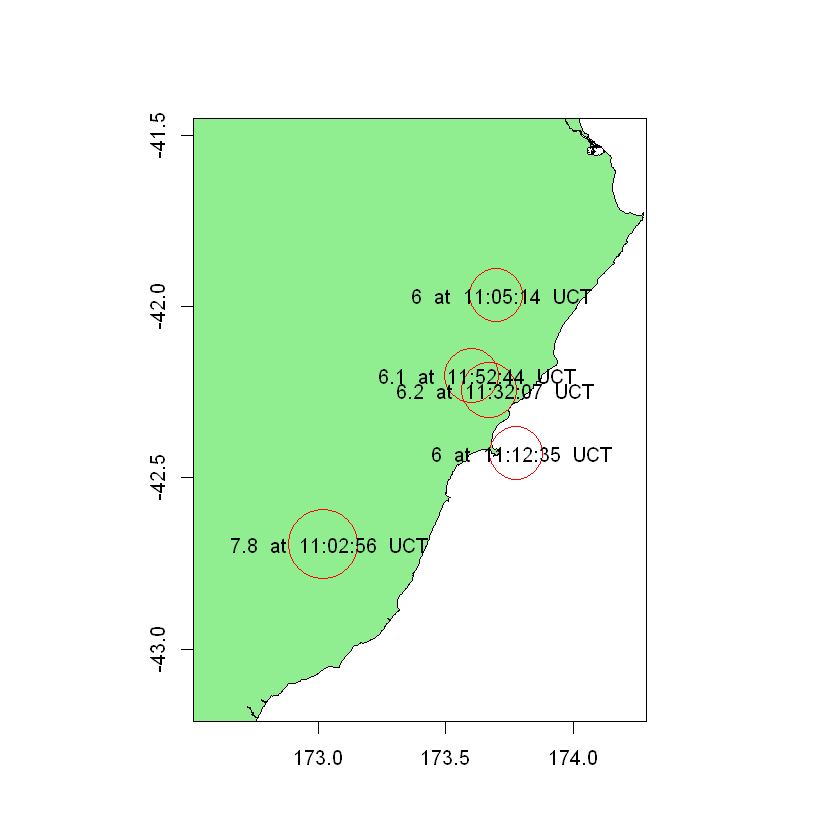

In [26]:
map('nzHires',xlim=c(xlow,xhigh),ylim=c(ylow,yhigh), fill=TRUE, col="lightgreen")
points(events$longitude, events$latitude, pch=1, cex=events$magnitude, col='red')
labels <- paste(" ", as.character(round(events$magnitude,1))," at ", substr(as.character(events$time), 12, 20), " UCT")
text(events$longitude, events$latitude, labels=labels, cex=1)
map.axes()

`map` makes the base map using the longitude and latitude as found above.
    The label now has the time of the event done by taking a sub-string of the time of the event.
    If you right click on this plot in the notebook you can save it.
For more about what you can do with maps go to http://www.geog.uoregon.edu/GeogR/ or run `library(help ="maps")`

###### Print the event data

In [11]:
events

,eventId,time,latitude,longitude,depth,author,cCatalog,contributor,contributorId,magType,magnitude,magAuthor,eventLocationName
3,2016p858000,2016-11-13 11:02:56,-42.693,173.022,15.1,GNS,GNS,GNS,2016p858000,Mw(mB),7.8,GNS,15 km north-east of Culverden
2,2016p858007,2016-11-13 11:05:14,-41.969,173.701,4.9,GNS,GNS,GNS,2016p858007,M,6.0,GNS,45 km south-west of Seddon
4,2016p858021,2016-11-13 11:12:35,-42.428,173.777,5.6,GNS,GNS,GNS,2016p858021,M,6.0,GNS,5 km east of Kaikoura
1,2016p858055,2016-11-13 11:32:07,-42.246,173.673,11.3,GNS,GNS,GNS,2016p858055,M,6.2,GNS,15 km north of Kaikoura
5,2016p858094,2016-11-13 11:52:44,-42.201,173.603,9.0,GNS,GNS,GNS,2016p858094,Mw(mB),6.1,GNS,20 km north of Kaikoura


In [15]:
events[1,]

,eventId,time,latitude,longitude,depth,author,cCatalog,contributor,contributorId,magType,magnitude,magAuthor,eventLocationName
3,2016p858000,2016-11-13 11:02:56,-42.693,173.022,15.1,GNS,GNS,GNS,2016p858000,Mw(mB),7.8,GNS,15 km north-east of Culverden


## Useful links. 

<ul>
<li>More on how to get seismic data can be found in the notebooks at https://github.com/GeoNet/data-tutorials/tree/master/Seismic_Data/R
<li> There is a station search at https://www.geonet.org.nz/data/network/sensor/search 
<li>IRISSeismic has a lot of functions that could be useful. Documentation of them with examples can be found at https://cran.r-project.org/web/packages/IRISSeismic/IRISSeismic.pdf
<li>To find out more about R go to https://www.r-project.org/
<li>To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame 
<li>To understand more about plots in R go to https://www.rdocumentation.org/packages/graphics/versions/3.5.1/topics/plot
<li> To understad more about maps in R go to https://cran.r-project.org/web/packages/maps/maps.pdf
<li> To learn more about what maps can be made in R go to http://www.geog.uoregon.edu/GeogR/
<li> For how to do all of this in python go to https://github.com/GeoNet/data-tutorials/tree/master/Seismic_Data/Python 